## Condo Transactions in 2024 (using Open Data)

In [ ]:
## !pip install folium

In [43]:
import pandas as pd

file_path = "CEASalespersonsPropertyTransactionRecordsresidential.csv"
df = pd.read_csv(file_path)
df.replace("-", pd.NA, inplace=True)

print("Dataset shape:", df.shape)
print("Column names:", df.columns.tolist())
df.head()

Dataset shape: (1147657, 9)
Column names: ['salesperson_name', 'transaction_date', 'salesperson_reg_num', 'property_type', 'transaction_type', 'represented', 'town', 'district', 'general_location']


,salesperson_name,transaction_date,salesperson_reg_num,property_type,transaction_type,represented,town,district,general_location
0,SOH HUI HUA,OCT-2017,P000003I,HDB,RESALE,SELLER,YISHUN,<NA>,<NA>
1,SOH HUI HUA,MAR-2018,P000003I,HDB,RESALE,BUYER,KALLANG/WHAMPOA,<NA>,<NA>
2,SOH HUI HUA,JAN-2017,P000003I,HDB,RESALE,BUYER,YISHUN,<NA>,<NA>
3,SOH HUI HUA,MAY-2018,P000003I,HDB,RESALE,SELLER,CHOA CHU KANG,<NA>,<NA>
4,SOH HUI HUA,NOV-2017,P000003I,HDB,RESALE,SELLER,CHOA CHU KANG,<NA>,<NA>


In [4]:
df.describe()

,salesperson_name,transaction_date,salesperson_reg_num,property_type,transaction_type,represented,town,district,general_location
count,1145023,1147657,1145102,1147657,1147657,1147657,522531,671040,671040
unique,30189,102,30616,5,5,4,28,28,28
top,"KUAH KAI PIN, KAVIN",JUL-2024,R043039D,CONDOMINIUM_APARTMENTS,WHOLE RENTAL,LANDLORD,SENGKANG,19,Serangoon Garden/ Hougang/ Punggol
freq,2768,20848,2768,556785,540219,506809,39412,61564,61564


In [45]:
# import matplotlib.pyplot as plt

# top_towns = df['town'].value_counts().head(10)

# plt.figure(figsize=(10, 6))
# top_towns.plot(kind='bar', color='skyblue')
# plt.title("Top 10 Towns by Number of Transactions")
# plt.xlabel("Town")
# plt.ylabel("Transaction Count")
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
# plt.show()

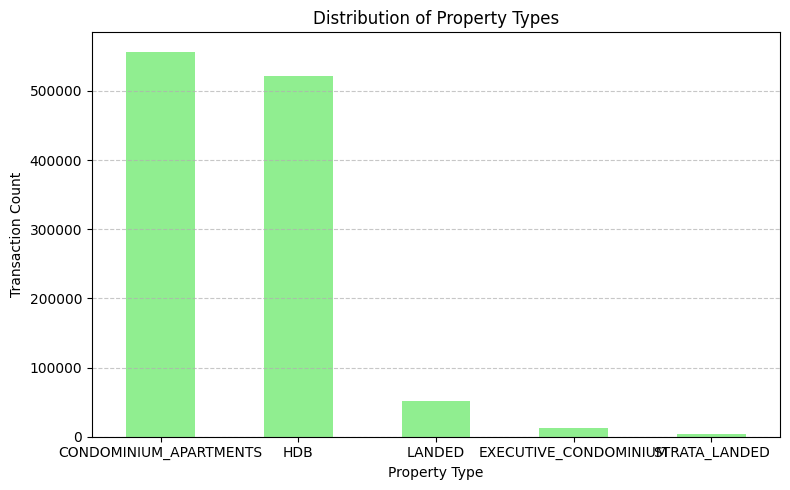

In [6]:
property_types = df['property_type'].value_counts()

plt.figure(figsize=(8, 5))
property_types.plot(kind='bar', color='lightgreen')
plt.title("Distribution of Property Types")
plt.xlabel("Property Type")
plt.ylabel("Transaction Count")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

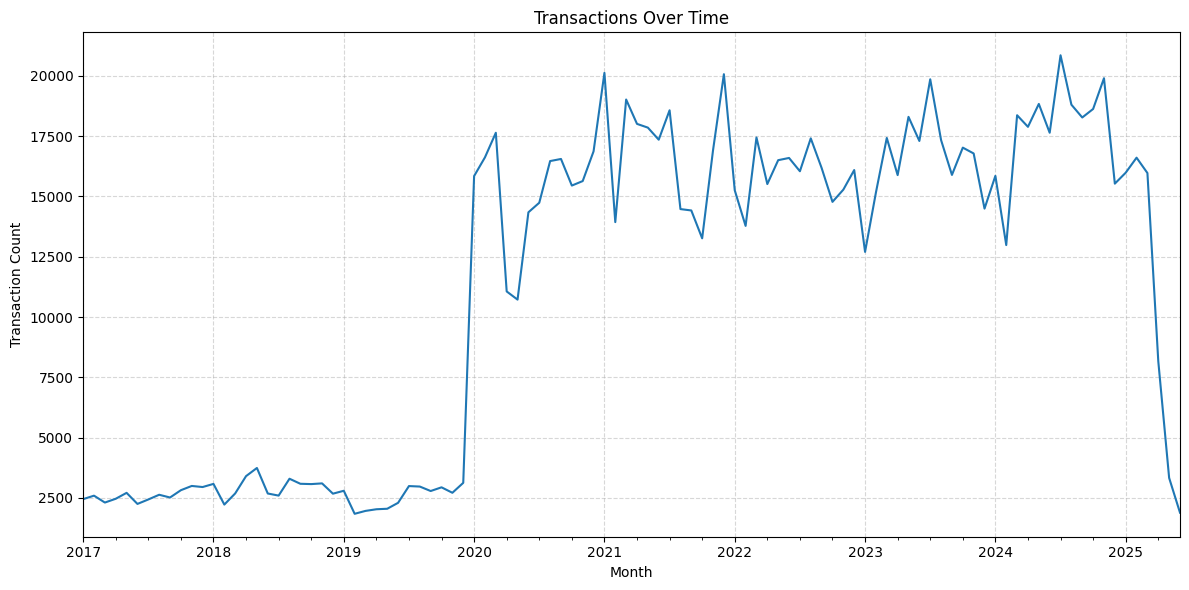

In [44]:
df['transaction_date_parsed'] = pd.to_datetime(df['transaction_date'], format='%b-%Y', errors='coerce')

monthly_trend = df['transaction_date_parsed'].dt.to_period("M").value_counts().sort_index()

plt.figure(figsize=(12, 6))
monthly_trend.plot()
plt.title("Transactions Over Time")
plt.xlabel("Month")
plt.ylabel("Transaction Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 2024 Condo Apartments Transactions

In [ ]:
# Filter for CONDOMINIUM_APARTMENTS in 2024
df_condo_2024 = df[
    (df['property_type'] == 'CONDOMINIUM_APARTMENTS') &
    (df['transaction_date_parsed'].dt.year == 2024)
]

# Drop rows missing either general_location or district
df_condo_2024 = df_condo_2024[
    df_condo_2024['district'].notna() &
    df_condo_2024['general_location'].notna()
]

# Group by general_location + district + transaction_type
grouped = df_condo_2024.groupby(['general_location', 'district', 'transaction_type']).size().unstack(fill_value=0)

# Add total column and sort
grouped['Total'] = grouped.sum(axis=1)
grouped_sorted = grouped.sort_values(by='Total', ascending=False)

grouped_sorted.head(15)

,transaction_type,NEW SALE,RESALE,ROOM RENTAL,SUB-SALE,WHOLE RENTAL,Total
general_location,district,,,,,,
Serangoon Garden/ Hougang/ Punggol,19,1012,3614,721,5,5463,10815
Orchard/ Cairnhill/ River Valley,09,193,897,558,5,8907,10560
Katong/ Joo Chiat/ Amber Road,15,2144,1632,395,2,6144,10317
Ardmore/ Bukit Timah/ Holland Road/ Tanglin,10,387,1062,272,5,8012,9738
Pasir Panjang/ Hong Leong Garden/ Clementi New Town,05,139,1447,693,5,5233,7517
Geylang/ Eunos,14,50,1274,797,0,3989,6110
Tampines/ Pasir Ris,18,11,1905,679,0,3229,5824
Queenstown/ Tiong Bahru,03,77,944,455,1,4314,5791
Hillview/ Dairy Farm/ Bukit Panjang/ Choa Chu Kang,23,921,1542,412,0,2881,5756


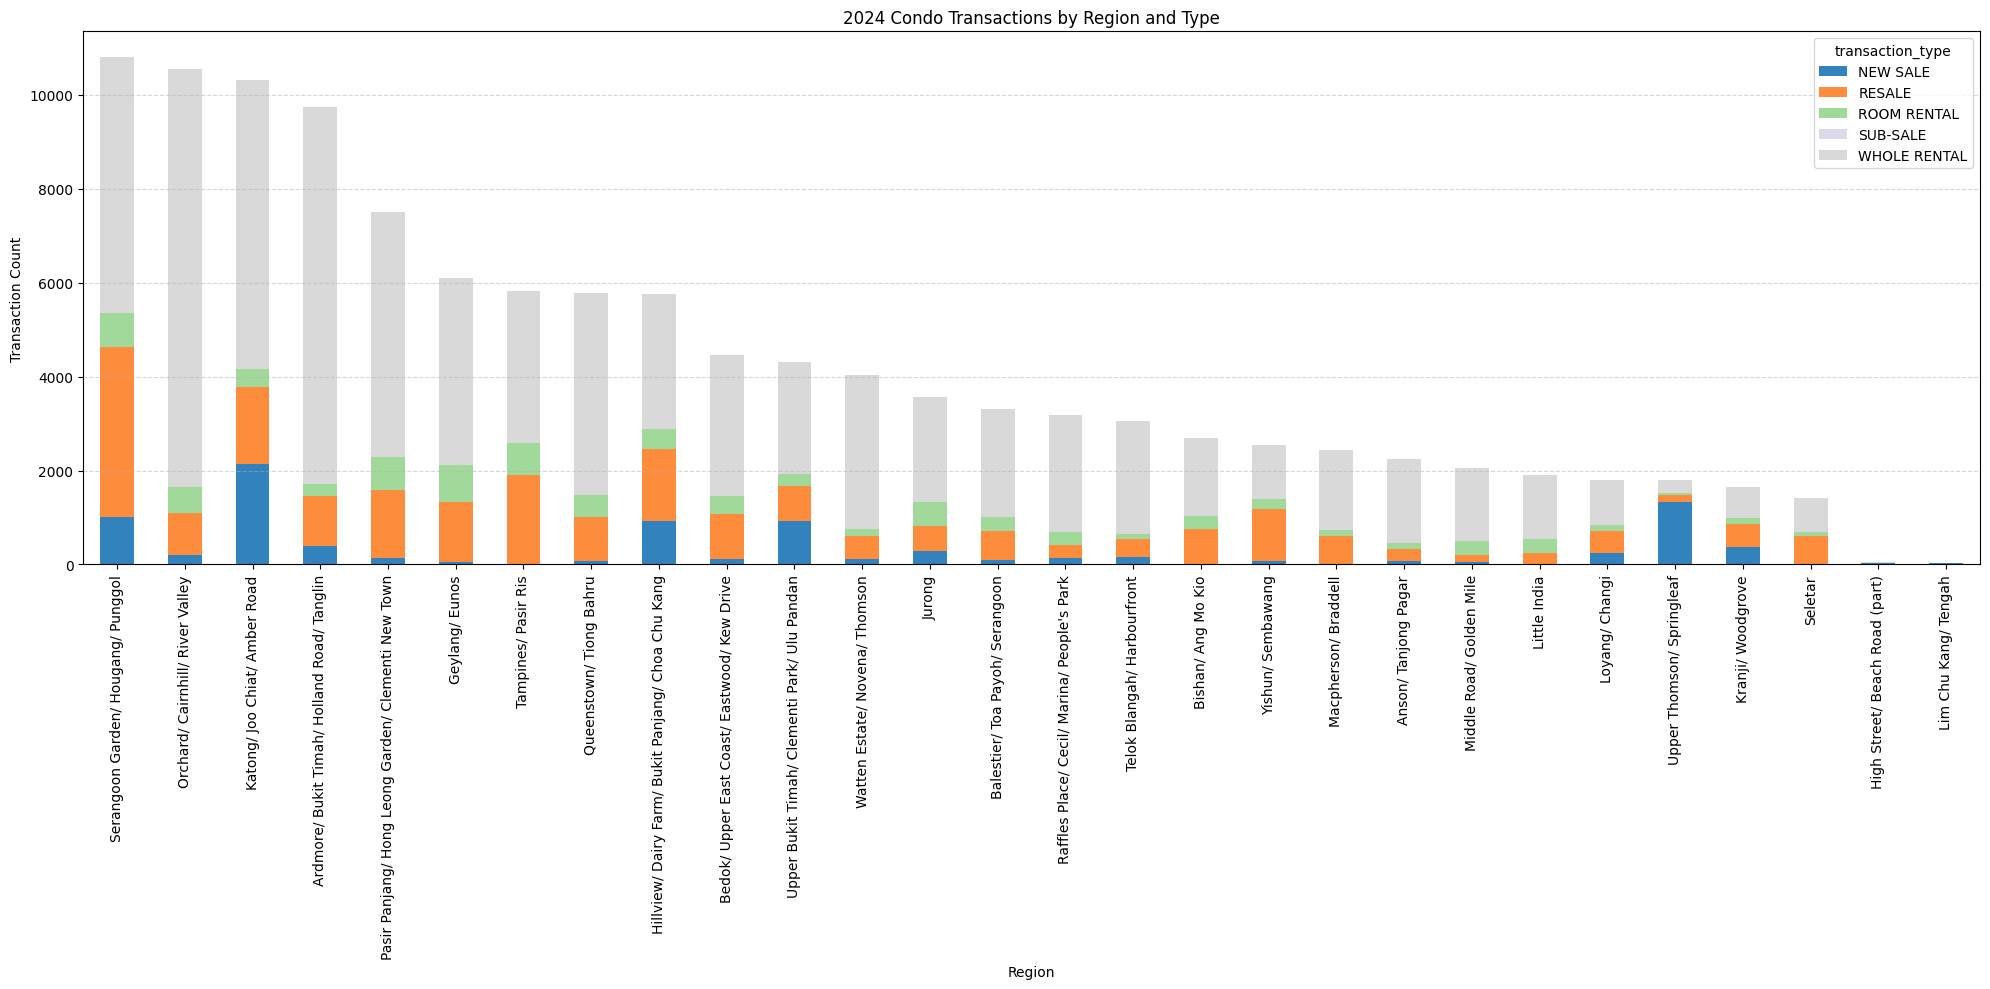

In [ ]:
import matplotlib.pyplot as plt

df_condo_2024 = df[
    (df['property_type'] == 'CONDOMINIUM_APARTMENTS') &
    (df['transaction_date_parsed'].dt.year == 2024) &
    (df['general_location'].notna())
]

grouped_region = df_condo_2024.groupby(['general_location', 'transaction_type']).size().unstack(fill_value=0)

grouped_region['Total'] = grouped_region.sum(axis=1)
grouped_region = grouped_region.sort_values(by='Total', ascending=False)

plot_df = grouped_region.drop(columns='Total')

plot_df.plot(
    kind='bar',
    stacked=True,
    figsize=(20, 10),
    colormap='tab20c'
)

plt.title("2024 Condo Transactions by Region and Type")
plt.xlabel("Region")
plt.ylabel("Transaction Count")
plt.xticks(rotation=90)  
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets

df_condo_2024 = df[
    (df['property_type'] == 'CONDOMINIUM_APARTMENTS') &
    (df['transaction_date_parsed'].dt.year == 2024) &
    (df['general_location'].notna())
]

all_transaction_types = sorted(df_condo_2024['transaction_type'].dropna().unique())

transaction_type_selector = widgets.SelectMultiple(
    options=all_transaction_types,
    value=tuple(all_transaction_types), 
    description='Tx Types',
    layout=widgets.Layout(width='50%'),
    style={'description_width': 'initial'}
)

def plot_filtered_transactions(selected_types):
    if not selected_types:
        print("Please select at least one transaction type.")
        return
    
    filtered = df_condo_2024[df_condo_2024['transaction_type'].isin(selected_types)]
    
    grouped = filtered.groupby(['general_location', 'transaction_type']).size().unstack(fill_value=0)
    grouped['Total'] = grouped.sum(axis=1)
    grouped = grouped.sort_values(by='Total', ascending=False)
    
    plot_df = grouped.drop(columns='Total')
    
    plot_df.plot(
        kind='bar',
        stacked=True,
        figsize=(20, 10),
        colormap='tab20c'
    )
    plt.title("2024 Condo Transactions by Region (Filtered by Transaction Type)")
    plt.ylabel("Transaction Count")
    plt.xlabel("Region")
    plt.xticks(rotation=90)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

interact(plot_filtered_transactions, selected_types=transaction_type_selector)

interactive(children=(SelectMultiple(description='Tx Types', index=(0, 1, 2, 3, 4), layout=Layout(width='50%')…

<function __main__.plot_filtered_transactions(selected_types)>

## Generate District Map

In [ ]:
import geopandas as gpd
import pandas as pd

gdf_districts = gpd.read_file("district.json")

print("GeoJSON Columns:", gdf_districts.columns)

if 'district' not in gdf_districts.columns:
    if 'id' in gdf_districts.columns:
        gdf_districts = gdf_districts.rename(columns={'id': 'district'})
    elif 'name' in gdf_districts.columns:
        gdf_districts = gdf_districts.rename(columns={'name': 'district'})
    else:
        raise ValueError("Could not find a 'district' column in GeoJSON.")

condo_df = grouped_sorted.reset_index()
condo_df['district'] = condo_df['district'].astype(str).str.lstrip('0')
gdf_districts['district'] = gdf_districts['district'].astype(str).str.lstrip('0')

gdf_merged = gdf_districts.merge(condo_df, on='district', how='left')

cols_to_fill = gdf_merged.select_dtypes(include='number').columns
gdf_merged[cols_to_fill] = gdf_merged[cols_to_fill].fillna(0)

gdf_merged.to_file("district_combined.geojson", driver="GeoJSON")
print("district_combined.geojson saved with condo data.")

GeoJSON Columns: Index(['id', 'name', 'latitude', 'longitude', 'geometry'], dtype='object')
✅ district_combined.geojson saved with condo data.


In [41]:
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
import pandas as pd
from ipywidgets import interact, widgets

gdf = gpd.read_file("district_combined.geojson")

tx_cols = [col for col in gdf.columns 
           if col.upper() not in ['DISTRICT', 'GENERAL_LOCATION', 'LATITUDE', 'LONGITUDE', 'GEOMETRY', 'TOTAL']
           and pd.api.types.is_numeric_dtype(gdf[col])]

tx_selector = widgets.SelectMultiple(
    options=tx_cols,
    value=(tx_cols[0],),
    description='Tx Types',
    layout=widgets.Layout(width='50%'),
    style={'description_width': 'initial'}
)

def plot_tx_map(selected_tx):
    if not selected_tx:
        print("Please select at least one transaction type.")
        return

    gdf['SelectedTotal'] = gdf[list(selected_tx)].sum(axis=1)

    m = folium.Map(location=[1.3521, 103.8198], zoom_start=11, tiles="cartodbpositron")

    folium.Choropleth(
        geo_data=gdf,
        data=gdf,
        columns=["district", "SelectedTotal"],
        key_on="feature.properties.district",
        fill_color="YlOrRd",
        fill_opacity=0.7,
        line_opacity=0.3,
        legend_name="Total Condo Transactions (2024)",
        highlight=True
    ).add_to(m)

    tooltip_fields = ['district', 'general_location'] + list(selected_tx)
    tooltip = GeoJsonTooltip(
        fields=tooltip_fields,
        aliases=[f"{col.replace('_', ' ').title()}:" for col in tooltip_fields],
        localize=True,
        sticky=True,
        labels=True,
        style="background-color: white; color: black; font-size: 12px; padding: 10px;"
    )

    folium.GeoJson(
        gdf,
        name="Districts",
        tooltip=tooltip,
        style_function=lambda feature: {
            'color': 'black',
            'weight': 0.5,
            'fillOpacity': 0
        }
    ).add_to(m)

    folium.LayerControl().add_to(m)
    display(m)

interact(plot_tx_map, selected_tx=tx_selector)

interactive(children=(SelectMultiple(description='Tx Types', index=(0,), layout=Layout(width='50%'), options=(…

<function __main__.plot_tx_map(selected_tx)>